In [111]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [112]:
raw_data_file_name= "Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_5_Fourier.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.751562,79.954525
1,A,0,6.751562,79.954525
2,A,1,6.745232,79.951666
3,A,2,6.740870,79.944298
4,A,3,6.740786,79.944269


In [113]:
raw_data.shape

(2371, 4)

In [114]:
raw_data = raw_data.sort_values(by=['cluster'])

In [115]:
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.751562,79.954525
954,A,0,6.751557,79.954519
308,A,0,6.751562,79.954525
307,A,0,6.751562,79.954525
1,A,0,6.751562,79.954525


In [116]:
raw_data = raw_data.groupby(['cluster']).mean()
raw_data

,lat,lon
cluster,,
0,6.751561,79.954524
1,6.745221,79.951653
2,6.740859,79.944303
3,6.740768,79.944264
4,6.739917,79.943765
5,6.739373,79.940915
6,6.737781,79.940703
7,6.737284,79.940634
8,6.736461,79.939916


In [117]:
raw_data.head()

,lat,lon
cluster,,
0,6.751561,79.954524
1,6.745221,79.951653
2,6.740859,79.944303
3,6.740768,79.944264
4,6.739917,79.943765


In [118]:
raw_data.shape

(185, 2)

In [119]:
raw_data = pd.DataFrame(raw_data).reset_index()

In [120]:
raw_data.head()

,cluster,lat,lon
0,0,6.751561,79.954524
1,1,6.745221,79.951653
2,2,6.740859,79.944303
3,3,6.740768,79.944264
4,4,6.739917,79.943765


In [121]:
raw_data.shape

(185, 3)

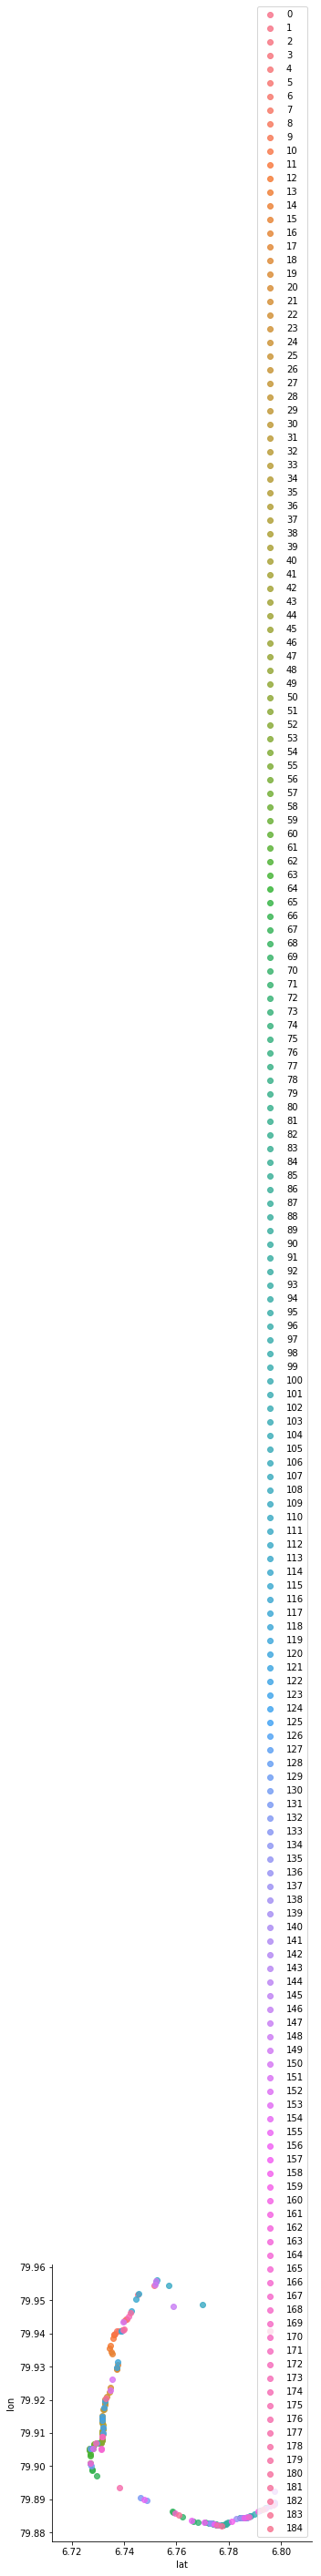

In [122]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [123]:
raw_data.to_json("Map_data/dilum_sir_route_without_duplications_radius_5_samplesize_5_Fourier.json", orient='records')